In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [ ]:
pip install category_encoders


In [ ]:
df = pd.read_excel('train.xlsx')
X_test = pd.read_excel('test.xlsx')

df.head()

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,NaN,NaN,Very useful,NaN,NaN,NaN,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,NaN,Always,Random Forests,Often,NaN,Often,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,NaN,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,NaN,NaN,NaN,Very useful,NaN,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,NaN,Sometimes,Most of the time,NaN,NaN,NaN,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,100% of projects,More internal than external,Business Department,NaN,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,NaN,Often,Often,NaN,NaN,Often,Sometimes,NaN,Sometimes,NaN,Sometimes,NaN,NaN,Sometimes,NaN,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,NaN,NaN,Very useful,NaN,Somewhat useful,NaN,NaN,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,NaN,NaN,NaN,Often,NaN,Sometimes,NaN,Often,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Rarely,Rarely,2.0,76-99% of projects,Do not know,Other,Rarely,9
4,5,Female,United States,35.0,Employed full-time,Yes,Software Developer/Software Engineer

In [ ]:
df.shape

(5529, 54)

In [ ]:
df = df.drop(["ID", "CodeWriter"], axis=1)
X_test = X_test.drop(["ID", "CodeWriter"], axis=1)

In [ ]:
df = df.drop(columns=["PastJobTitlesSelect", "MLTechniquesSelect", "WorkAlgorithmsSelect"])
X_test = X_test.drop(columns=["PastJobTitlesSelect", "MLTechniquesSelect", "WorkAlgorithmsSelect"]) ## ??????????????????????????????

In [ ]:
mapping_titlefit = {'Fine': 2, 'Poorly': 1, 'Perfectly': 3}

mapping_usefulness = {'Somewhat useful': 2, 'Very useful': 3, 'Not Useful': 1}

mapping_edu = {"Bachelor's degree": 3, "Master's degree": 4, 'Doctoral degree': 5,
 "Some college/university study without earning a bachelor's degree": 2,
 'Professional degree': 3,
 'I did not complete any formal education past high school': 1,
 'I prefer not to answer': np.nan}

mapping_tenure = {'3 to 5 years': 3, '1 to 2 years': 2, '6 to 10 years': 4, 'More than 10 years': 5,'Less than a year': 1, "I don't write code to analyze data": 0}

mapping_workprod_n_remote = {'Always': 4, 'Rarely': 1, 'Sometimes': 2, 'Most of the time': 3, 'Never': 0, "Don't know": np.nan}

mapping_freq = {'Often': 3, 'Most of the time': 4, 'Sometimes': 2, 'Rarely': 1}

mapping_vis = {'51-75% of projects': 4, '100% of projects': 6, '10-25% of projects': 2, '76-99% of projects': 5, 'Less than 10% of projects': 1, '26-50% of projects': 3, 'None': 0}

mapping_employerSize = { '1,000 to 4,999 employees':6, '5,000 to 9,999 employees':7,
 '10,000 or more employees':8, 'Fewer than 10 employees':1, '10 to 19 employees':2,
 '500 to 999 employees':5, "I don't know": np.nan, '20 to 99 employees':3,
 '100 to 499 employees':4 ,'I prefer not to answer' : 0 }



In [ ]:
df['TitleFit'] = df['TitleFit'].replace(mapping_titlefit)

for c in ['LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube']:
    df[c] = df[c].replace(mapping_usefulness)

#df['FormalEducation'] = df['FormalEducation'].replace(mapping_edu)

df['Tenure'] = df['Tenure'].replace(mapping_tenure)

df['WorkProductionFrequency'] = df['WorkProductionFrequency'].replace(mapping_workprod_n_remote)

df['RemoteWork'] = df['RemoteWork'].replace(mapping_workprod_n_remote)

df['EmployerSize'] = df['EmployerSize'].replace(mapping_employerSize)

for c in ['WorkToolsFrequencyPython', 'WorkToolsFrequencyR',
       'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       'WorkMethodsFrequencyDecisionTrees',
       'WorkMethodsFrequencyLogisticRegression',
       'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA',
       'WorkMethodsFrequencyRandomForests',
       'WorkMethodsFrequencyTimeSeriesAnalysis',
       'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',
       'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining',
       'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity',
       'WorkChallengeFrequencyDataAccess']:
    df[c] = df[c].replace(mapping_freq)

df['WorkDataVisualizations'] = df['WorkDataVisualizations'].replace(mapping_vis)


In [ ]:
X_test['TitleFit'] = X_test['TitleFit'].replace(mapping_titlefit)

for c in ['LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube']:
    X_test[c] = X_test[c].replace(mapping_usefulness)

#X_test['FormalEducation'] = X_test['FormalEducation'].replace(mapping_edu)

X_test['Tenure'] = X_test['Tenure'].replace(mapping_tenure)

X_test['WorkProductionFrequency'] = X_test['WorkProductionFrequency'].replace(mapping_workprod_n_remote)

X_test['RemoteWork'] = X_test['RemoteWork'].replace(mapping_workprod_n_remote)


X_test['EmployerSize'] = X_test['EmployerSize'].replace(mapping_employerSize)

for c in ['WorkToolsFrequencyPython', 'WorkToolsFrequencyR',
       'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       'WorkMethodsFrequencyDecisionTrees',
       'WorkMethodsFrequencyLogisticRegression',
       'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA',
       'WorkMethodsFrequencyRandomForests',
       'WorkMethodsFrequencyTimeSeriesAnalysis',
       'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',
       'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining',
       'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity',
       'WorkChallengeFrequencyDataAccess']:
    X_test[c] = X_test[c].replace(mapping_freq)

X_test['WorkDataVisualizations'] = X_test['WorkDataVisualizations'].replace(mapping_vis)


In [ ]:
df.dtypes

GenderSelect                               object
Country                                    object
Age                                       float64
EmploymentStatus                           object
CurrentJobTitleSelect                      object
TitleFit                                  float64
CurrentEmployerType                        object
MLToolNextYearSelect                       object
MLMethodNextYearSelect                     object
LanguageRecommendationSelect               object
LearningPlatformUsefulnessBlogs           float64
LearningPlatformUsefulnessKaggle          float64
LearningPlatformUsefulnessCourses         float64
LearningPlatformUsefulnessProjects        float64
LearningPlatformUsefulnessSO              float64
LearningPlatformUsefulnessTextbook        float64
LearningPlatformUsefulnessYouTube         float64
DataScienceIdentitySelect                  object
FormalEducation                            object
MajorSelect                                object


In [ ]:
#df["AgeGroup"] = pd.cut(df["Age"], [0, 24, 38, 60, 100], labels=['Young', 'YoungAdult', 'Adult', 'Older'], retbins=True, right=True)[0]
#X_test["AgeGroup"] = pd.cut(X_test["Age"], [0, 24, 38, 60, 100], labels=['Young', 'YoungAdult', 'Adult', 'Older'], retbins=True, right=True)[0]


In [ ]:
# OBJ COLUMNS
obj_cols = []
for x in range(len(df.dtypes)):
    if df.dtypes[x] == object:
        obj_cols += [df.columns.tolist()[x]]

In [ ]:
obj_cols

['GenderSelect',
 'Country',
 'EmploymentStatus',
 'CurrentJobTitleSelect',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'DataScienceIdentitySelect',
 'FormalEducation',
 'MajorSelect',
 'MLSkillsSelect',
 'EmployerIndustry',
 'WorkInternalVsExternalTools',
 'WorkMLTeamSeatSelect']

In [ ]:
df.isna().sum()

GenderSelect                                10
Country                                     16
Age                                         68
EmploymentStatus                             0
CurrentJobTitleSelect                        2
TitleFit                                   102
CurrentEmployerType                         71
MLToolNextYearSelect                       231
MLMethodNextYearSelect                     277
LanguageRecommendationSelect               195
LearningPlatformUsefulnessBlogs           2998
LearningPlatformUsefulnessKaggle          2361
LearningPlatformUsefulnessCourses         2588
LearningPlatformUsefulnessProjects        3030
LearningPlatformUsefulnessSO              2533
LearningPlatformUsefulnessTextbook        3327
LearningPlatformUsefulnessYouTube         3116
DataScienceIdentitySelect                 1545
FormalEducation                              7
MajorSelect                                519
Tenure                                      14
MLSkillsSelec

In [ ]:
X_train = df.drop("JobSatisfaction", axis=1)
y_train = df["JobSatisfaction"]

In [ ]:
#ENCODING
import category_encoders as ce


In [ ]:
X_train.isna().sum()

GenderSelect                                10
Country                                     16
Age                                         68
EmploymentStatus                             0
CurrentJobTitleSelect                        2
TitleFit                                   102
CurrentEmployerType                         71
MLToolNextYearSelect                       231
MLMethodNextYearSelect                     277
LanguageRecommendationSelect               195
LearningPlatformUsefulnessBlogs           2998
LearningPlatformUsefulnessKaggle          2361
LearningPlatformUsefulnessCourses         2588
LearningPlatformUsefulnessProjects        3030
LearningPlatformUsefulnessSO              2533
LearningPlatformUsefulnessTextbook        3327
LearningPlatformUsefulnessYouTube         3116
DataScienceIdentitySelect                 1545
FormalEducation                              7
MajorSelect                                519
Tenure                                      14
MLSkillsSelec

In [ ]:
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

In [ ]:
encoder=ce.TargetEncoder(cols=obj_cols)
encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
imputer.fit(X_train, y_train)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=10, weights='uniform')

In [ ]:
X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

abc = SelectKBest(chi2, k='all').fit(X_train, y_train)
X_train2 = pd.DataFrame(abc.transform(X_train), columns=X_train.columns)
X_test2 = pd.DataFrame(abc.transform(X_test), columns=X_test.columns)

Feature GenderSelect: 0.020340
Feature Country: 6.294469
Feature Age: 200.247531
Feature EmploymentStatus: 0.131931
Feature CurrentJobTitleSelect: 6.951660
Feature TitleFit: 37.105669
Feature CurrentEmployerType: 10.273577
Feature MLToolNextYearSelect: 0.920526
Feature MLMethodNextYearSelect: 0.042455
Feature LanguageRecommendationSelect: 0.029635
Feature LearningPlatformUsefulnessBlogs: 0.728125
Feature LearningPlatformUsefulnessKaggle: 0.504736
Feature LearningPlatformUsefulnessCourses: 0.414621
Feature LearningPlatformUsefulnessProjects: 1.220383
Feature LearningPlatformUsefulnessSO: 0.441887
Feature LearningPlatformUsefulnessTextbook: 0.536389
Feature LearningPlatformUsefulnessYouTube: 0.532916
Feature DataScienceIdentitySelect: 3.248893
Feature FormalEducation: 0.540224
Feature MajorSelect: 0.104345
Feature Tenure: 38.592812
Feature MLSkillsSelect: 15.448125
Feature EmployerIndustry: 0.107173
Feature EmployerSize: 7.104566
Feature WorkProductionFrequency: 72.701844
Feature WorkToo

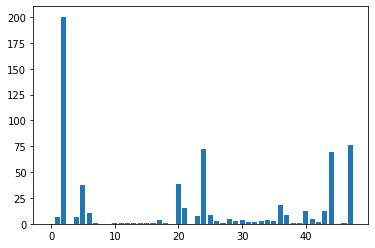

In [ ]:

for i in range(len(abc.scores_)):
	print('Feature %s: %f' % (X_train2.columns.tolist()[i], abc.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(abc.scores_))], abc.scores_)
plt.show()

In [ ]:
fea_list = X_train2.columns.tolist()
sco_list = abc.scores_

In [ ]:
tmp = zip(sco_list, fea_list)
tmp = sorted(tmp, reverse=True)
selected = [x for _,x in tmp[:24]]

In [ ]:
selected

['Age',
 'RemoteWork',
 'WorkProductionFrequency',
 'WorkDataVisualizations',
 'Tenure',
 'TitleFit',
 'WorkChallengeFrequencyPolitics',
 'MLSkillsSelect',
 'WorkChallengeFrequencyTalent',
 'CompensationScore',
 'CurrentEmployerType',
 'WorkToolsFrequencyPython',
 'WorkChallengeFrequencyUnusedResults',
 'EmployerSize',
 'CurrentJobTitleSelect',
 'Country',
 'WorkMethodsFrequencyCross-Validation',
 'WorkChallengeFrequencyClarity',
 'WorkMethodsFrequencyDecisionTrees',
 'WorkMethodsFrequencyRandomForests',
 'DataScienceIdentitySelect',
 'WorkMethodsFrequencyDataVisualization',
 'WorkToolsFrequencyR',
 'WorkMethodsFrequencyPCA']

In [ ]:
X_train = X_train[selected]
X_test = X_test[selected]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_depth= 15, min_samples_leaf= 25, min_samples_split= 20)
rf.fit(X_train, y_train)
scores = cross_val_score(rf, X_train, y_train,cv=5, scoring='neg_root_mean_squared_error')
scores.mean()

-1.942230323103652

In [ ]:
params = {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1, 'criterion': 'mse', 'min_samples_leaf':1, 'min_samples_split': 2}
m = GradientBoostingRegressor(**params)
m.fit(X_train, y_train)
scores = cross_val_score(m, X_train, y_train,cv=5, scoring='neg_root_mean_squared_error')
scores.mean()

-1.9171827240960808

In [ ]:
from xgboost import XGBRegressor

best_xgb_model = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.95,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

[22:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.95, verbosity=1)

In [ ]:
scores = cross_val_score(best_xgb_model, X_train, y_train,cv=5, scoring='neg_root_mean_squared_error')
scores.mean()

[22:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-1.9120399770085938

In [ ]:
pred_test = best_xgb_model.predict(X_test)
final = pd.DataFrame()
final['ID'] = range(1, len(pred_test) + 1)
final['Prediction'] = pred_test
final.to_csv('Submission.csv', index=False)
final.head()


,ID,Prediction
0,1,8.160018
1,2,7.024813
2,3,7.277778
3,4,6.879684
4,5,7.887024
